In [15]:
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
sys.path.append(os.path.abspath('../data'))

train_data = pd.read_csv('../data/train.csv')
tipi_data = train_data.loc[:, 'TIPI1': 'TIPI10']
vcl_data = train_data.loc[:, 'VCL1': 'VCL16']
label_data = train_data.loc[:, 'nerdiness']

In [2]:
train_data.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


In [3]:
train_data.describe()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
count,15000.000000,14959.000000,14931.000000,14950.000000,14929.000000,14962.000000,14952.000000,14924.000000,14952.000000,14944.000000,...,14953.000000,15000.000000,14953.000000,14755.000000,14601.000000,14915.000000,14918.000000,14681.000000,14911.000000,15000.000000
mean,7499.500000,3.972859,4.065702,4.222809,3.795499,3.856503,3.676364,4.183262,3.879013,3.915418,...,1.346018,26.740867,1.185113,4.098340,1.847956,1.633121,1.179917,2.744091,1.938703,0.553533
std,4330.271354,1.095914,1.169681,1.023335,1.219940,1.195622,1.170986,1.059756,1.302081,1.117625,...,0.475715,317.058436,0.481993,3.425699,1.223191,0.481969,0.465985,24.109344,0.239882,0.497142
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3749.750000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,1.000000,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000
50%,7499.500000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,...,1.000000,20.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000
75%,11249.250000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,27.000000,1.000000,6.000000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000
max,14999.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,38822.000000,3.000000,12.000000,5.000000,2.000000,3.000000,2919.000000,2.000000,1.000000


In [4]:
tipi_data.head()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
0,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0
1,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0
2,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0
3,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0
4,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0


In [5]:
tipi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIPI1   14947 non-null  float64
 1   TIPI2   14934 non-null  float64
 2   TIPI3   14921 non-null  float64
 3   TIPI4   14936 non-null  float64
 4   TIPI5   14930 non-null  float64
 5   TIPI6   14938 non-null  float64
 6   TIPI7   14936 non-null  float64
 7   TIPI8   14935 non-null  float64
 8   TIPI9   14936 non-null  float64
 9   TIPI10  14920 non-null  float64
dtypes: float64(10)
memory usage: 1.1 MB


In [6]:
tipi_data.describe()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
count,14947.000000,14934.000000,14921.000000,14936.000000,14930.000000,14938.000000,14936.000000,14935.000000,14936.000000,14920.000000
mean,2.623135,3.037565,3.466122,3.275308,3.876088,3.682287,3.529191,3.039103,3.161422,2.177413
std,1.150815,1.059533,0.999300,1.175920,0.911841,1.108197,1.015622,1.140791,1.067203,1.034280
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000
75%,3.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<AxesSubplot:>

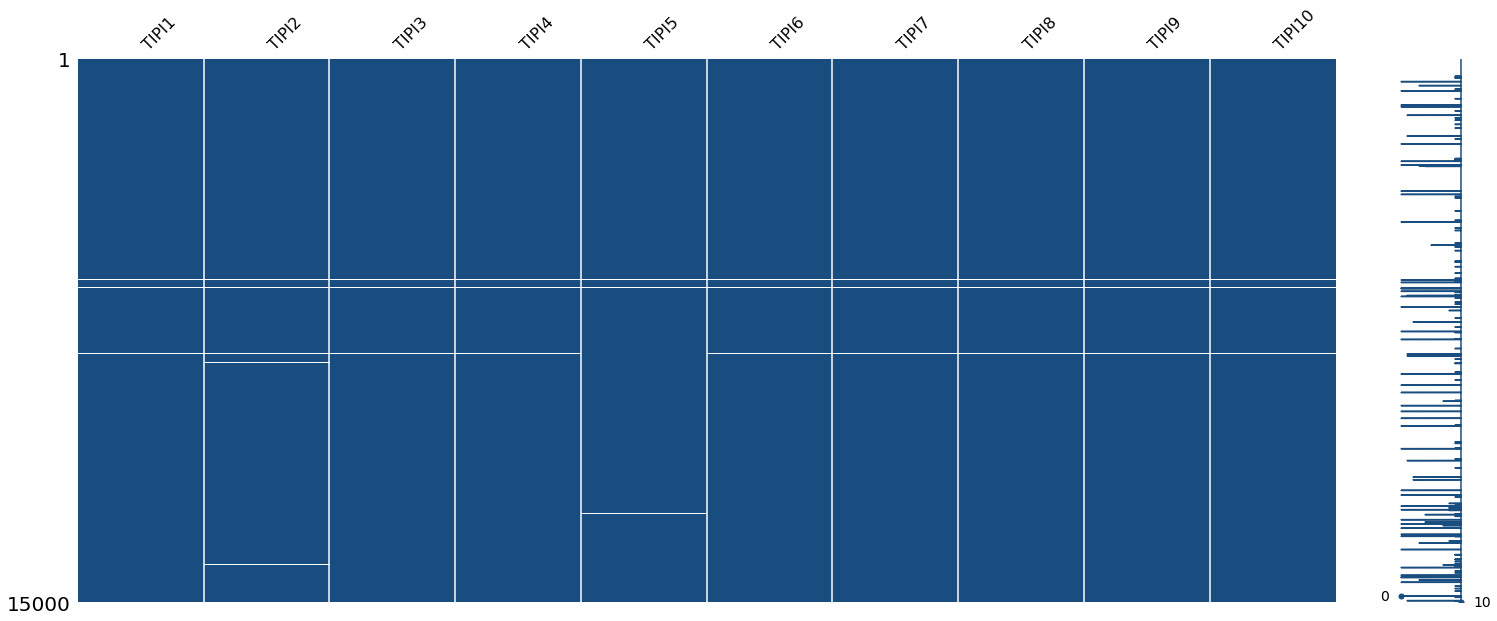

In [7]:
msno.matrix(df=tipi_data.iloc[:, :], color=(0.1, 0.3, 0.5))

In [8]:
vcl_data.head()

,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16
0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1
1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1
2,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1
3,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1
4,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1


In [9]:
vcl_data.describe()

,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000
mean,0.958667,0.921667,0.529133,0.968400,0.947333,0.101533,0.236000,0.436600,0.067200,0.956067,0.280067,0.210267,0.761133,0.90620,0.959867,0.980600
std,0.199067,0.268704,0.499167,0.174939,0.223375,0.302044,0.424636,0.495981,0.250376,0.204954,0.449047,0.407512,0.426405,0.29156,0.196278,0.137931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
vcl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   VCL1    15000 non-null  int64
 1   VCL2    15000 non-null  int64
 2   VCL3    15000 non-null  int64
 3   VCL4    15000 non-null  int64
 4   VCL5    15000 non-null  int64
 5   VCL6    15000 non-null  int64
 6   VCL7    15000 non-null  int64
 7   VCL8    15000 non-null  int64
 8   VCL9    15000 non-null  int64
 9   VCL10   15000 non-null  int64
 10  VCL11   15000 non-null  int64
 11  VCL12   15000 non-null  int64
 12  VCL13   15000 non-null  int64
 13  VCL14   15000 non-null  int64
 14  VCL15   15000 non-null  int64
 15  VCL16   15000 non-null  int64
dtypes: int64(16)
memory usage: 1.8 MB


c:\Users\oh010\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


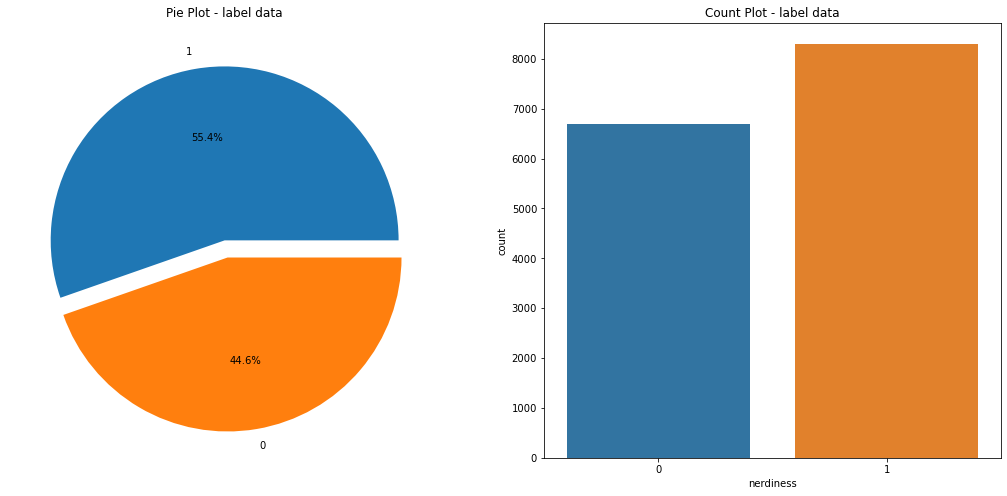

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

label_data.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Pie Plot - label data')
ax[0].set_ylabel('')

sns.countplot('nerdiness', data=train_data, ax=ax[1])
ax[1].set_title('Count Plot - label data')

plt.show()

In [18]:
label_data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15000 entries, 0 to 14999
Series name: nerdiness
Non-Null Count  Dtype
--------------  -----
15000 non-null  int64
dtypes: int64(1)
memory usage: 117.3 KB


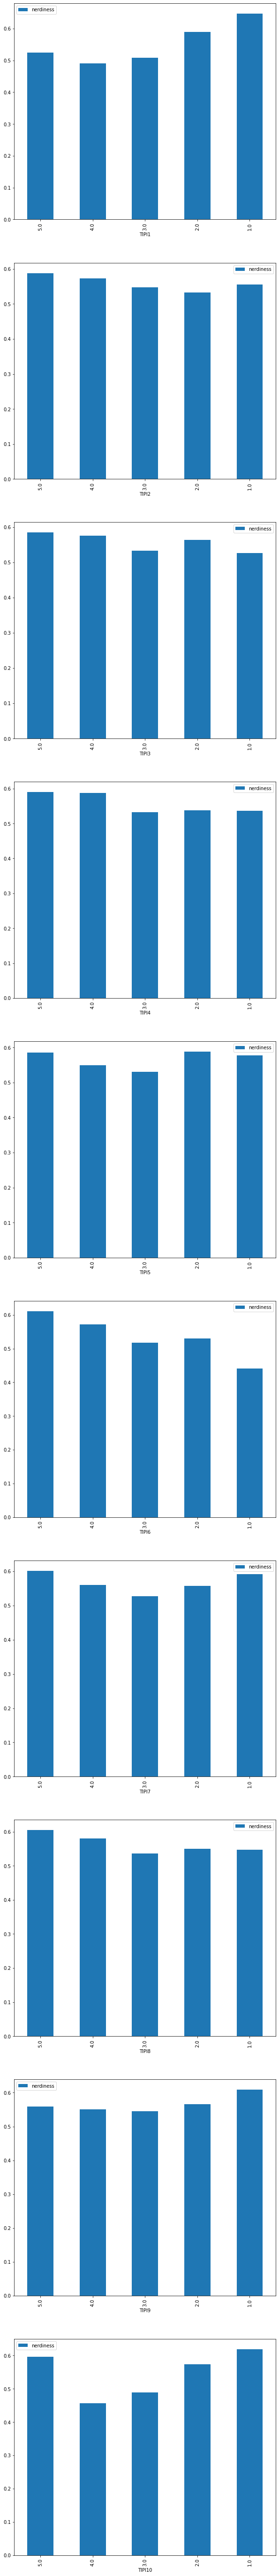

In [30]:
f, ax = plt.subplots(10, 1, figsize=(10, 100))
for i in range(10):
    df_data = pd.DataFrame([tipi_data.iloc[:, i], label_data]).transpose()
    index='TIPI'+str(i + 1)
    df_data.groupby([index], as_index=True).mean().sort_values(by=index, ascending=False).plot.bar(ax=ax[i])

In [39]:
pd.crosstab(vcl_data.iloc[:, 0], label_data, margins=True).style.background_gradient(cmap='summer_r')

nerdiness,0,1,All
VCL1,,,
0,329,291,620
1,6368,8012,14380
All,6697,8303,15000


In [41]:
pd.crosstab(vcl_data.iloc[:, 1], label_data, margins=True).style.background_gradient(cmap='summer_r')

nerdiness,0,1,All
VCL2,,,
0,671,504,1175
1,6026,7799,13825
All,6697,8303,15000


In [43]:
pd.crosstab(vcl_data.iloc[:, 2], label_data, margins=True).style.background_gradient(cmap='summer_r')

nerdiness,0,1,All
VCL3,,,
0,3559,3504,7063
1,3138,4799,7937
All,6697,8303,15000


In [44]:
pd.crosstab(vcl_data.iloc[:, 3], label_data, margins=True).style.background_gradient(cmap='summer_r')

nerdiness,0,1,All
VCL4,,,
0,270,204,474
1,6427,8099,14526
All,6697,8303,15000


In [46]:
pd.crosstab(vcl_data.iloc[:, 4], label_data, margins=True).style.background_gradient(cmap='summer_r')

nerdiness,0,1,All
VCL5,,,
0,438,352,790
1,6259,7951,14210
All,6697,8303,15000


In [47]:
pd.crosstab(vcl_data.iloc[:, 5], label_data, margins=True).style.background_gradient(cmap='summer_r')

nerdiness,0,1,All
VCL6,,,
0,6092,7385,13477
1,605,918,1523
All,6697,8303,15000


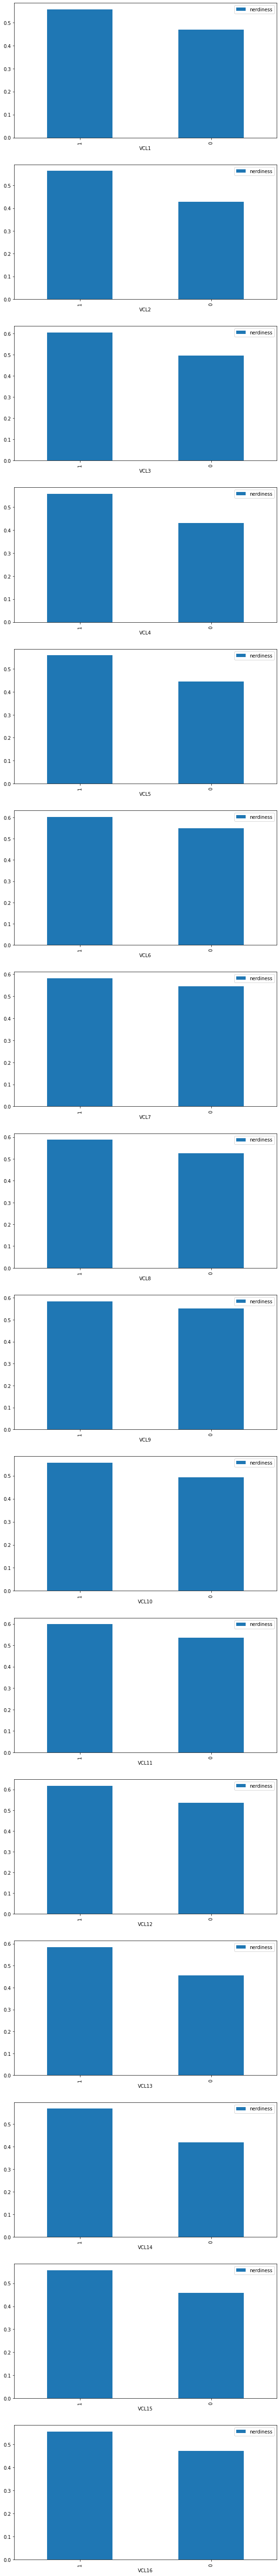

In [50]:
f, ax = plt.subplots(16, 1, figsize=(10, 100))
for i, col in enumerate(vcl_data.columns):
    df_data = pd.DataFrame([vcl_data.iloc[:, i], label_data]).transpose()
    index='VCL'+str(i + 1)
    df_data.groupby([index], as_index=True).mean().sort_values(by=index, ascending=False).plot.bar(ax=ax[i])